<a href="https://colab.research.google.com/github/jrctechmind/data-science-portfolio/blob/main/Desafio_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nova seção

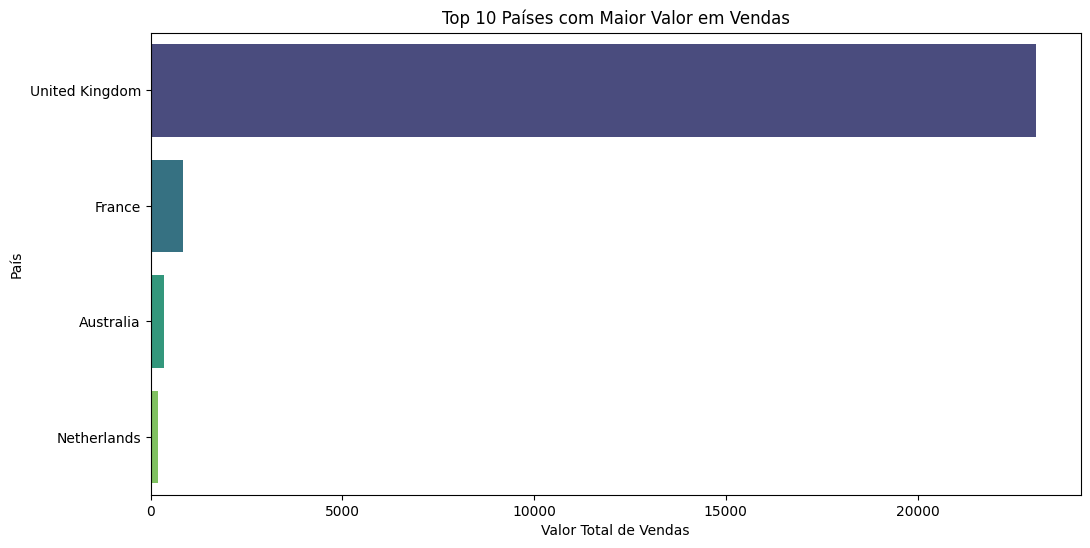

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1400: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


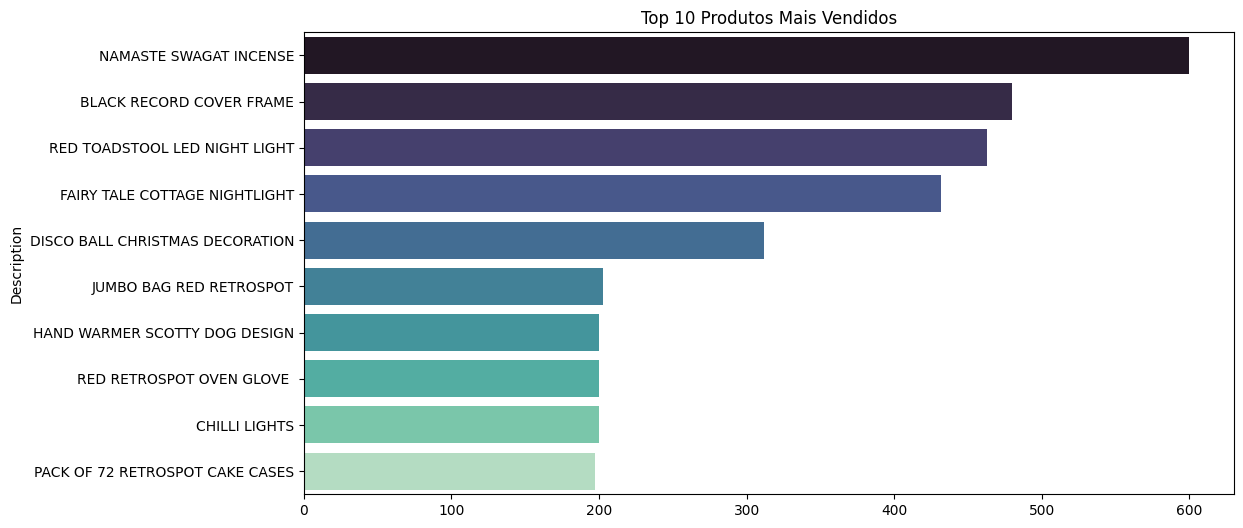

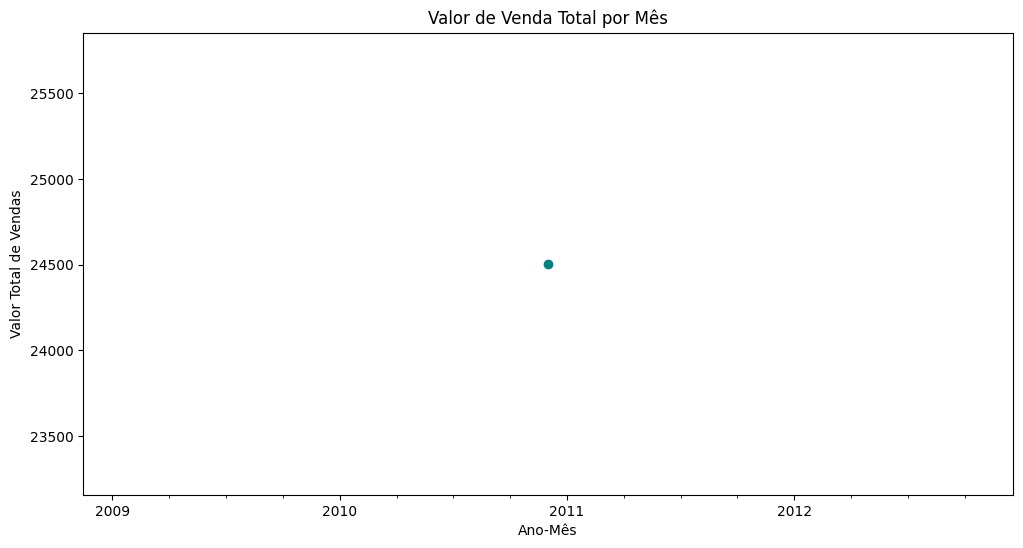

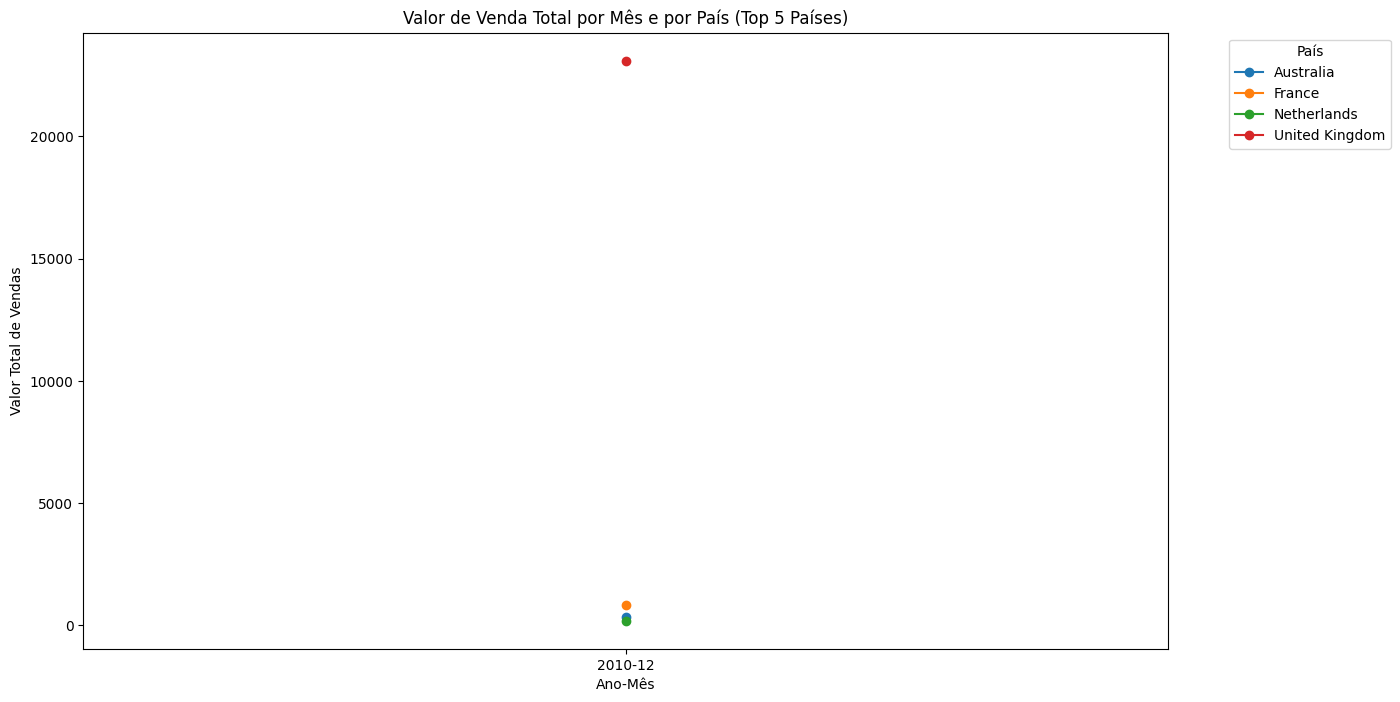

In [ ]:
# Gráficos

# Top 10 países com maior valor em vendas
top_paises = dados.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_paises.values, y=top_paises.index, palette='viridis')
plt.title('Top 10 Países com Maior Valor em Vendas')
plt.xlabel('Valor Total de Vendas')
plt.ylabel('País')
plt.show()

# Top 10 produtos mais vendidos
top_produtos = dados.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_produtos.values, y=top_produtos.index, palette='mako')
plt.title('Top 10 Produtos Mais Vendidos')

# Valor de venda total por mês
dados['AnoMes'] = pd.to_datetime(dados['InvoiceDate']).dt.to_period('M')
vendas_por_mes = dados.groupby('AnoMes')['TotalPrice'].sum()
plt.figure(figsize=(12, 6))
vendas_por_mes.plot(marker='o', color='teal')
plt.title('Valor de Venda Total por Mês')
plt.xlabel('Ano-Mês')
plt.ylabel('Valor Total de Vendas')
plt.show()

# Valor de venda total por mês e por país (considere apenas os top 5)
top_paises = dados.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(5).index
vendas_por_mes_paises = dados[dados['Country'].isin(top_paises)].groupby(['AnoMes', 'Country'])['TotalPrice'].sum().unstack()

# Converter períodos para representação numérica
vendas_por_mes_paises.index = vendas_por_mes_paises.index.astype(str)

plt.figure(figsize=(14, 8))
for pais in vendas_por_mes_paises.columns:
    plt.plot(vendas_por_mes_paises.index, vendas_por_mes_paises[pais], label=pais, marker='o')

plt.title('Valor de Venda Total por Mês e por País (Top 5 Países)')
plt.xlabel('Ano-Mês')
plt.ylabel('Valor Total de Vendas')
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



[INFO] Carregando o arquivo CSV...
Por favor, faça o upload do arquivo 'data.csv'


Saving data.csv to data.csv

[INFO] Nomes das Colunas:
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

[INFO] Descrição dos Dados:
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

[INFO] Tipos de Dados:
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

[INFO] Tratando valores faltantes...
Valores Faltantes:
InvoiceNo           0
StockCode    

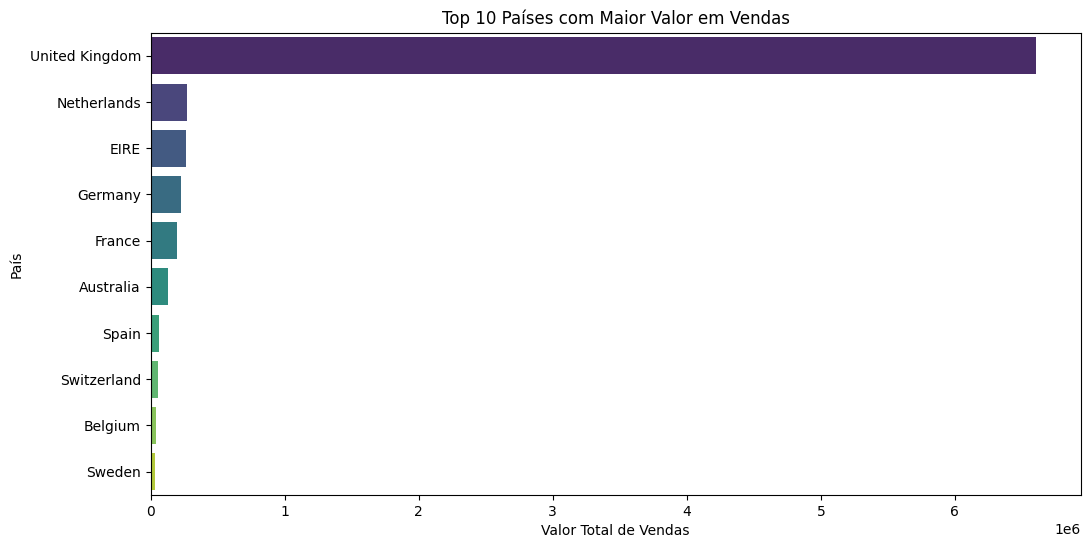

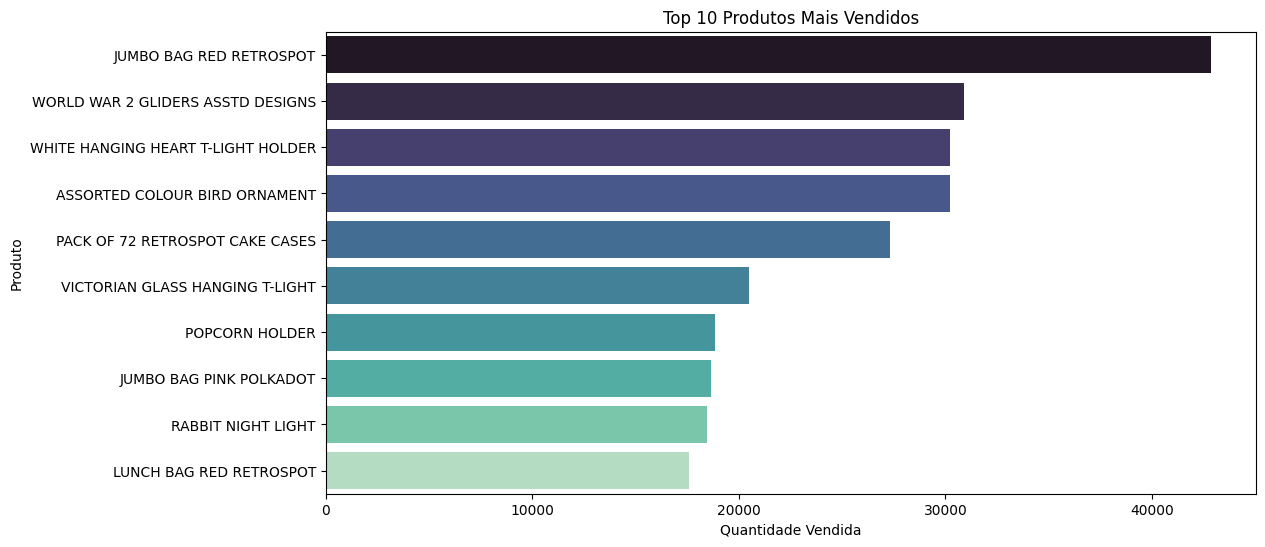

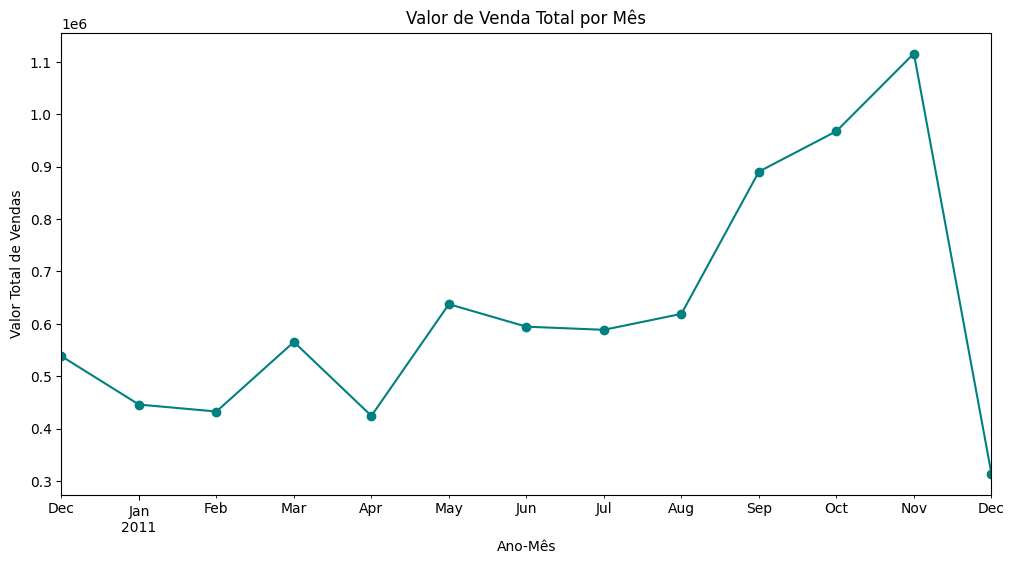

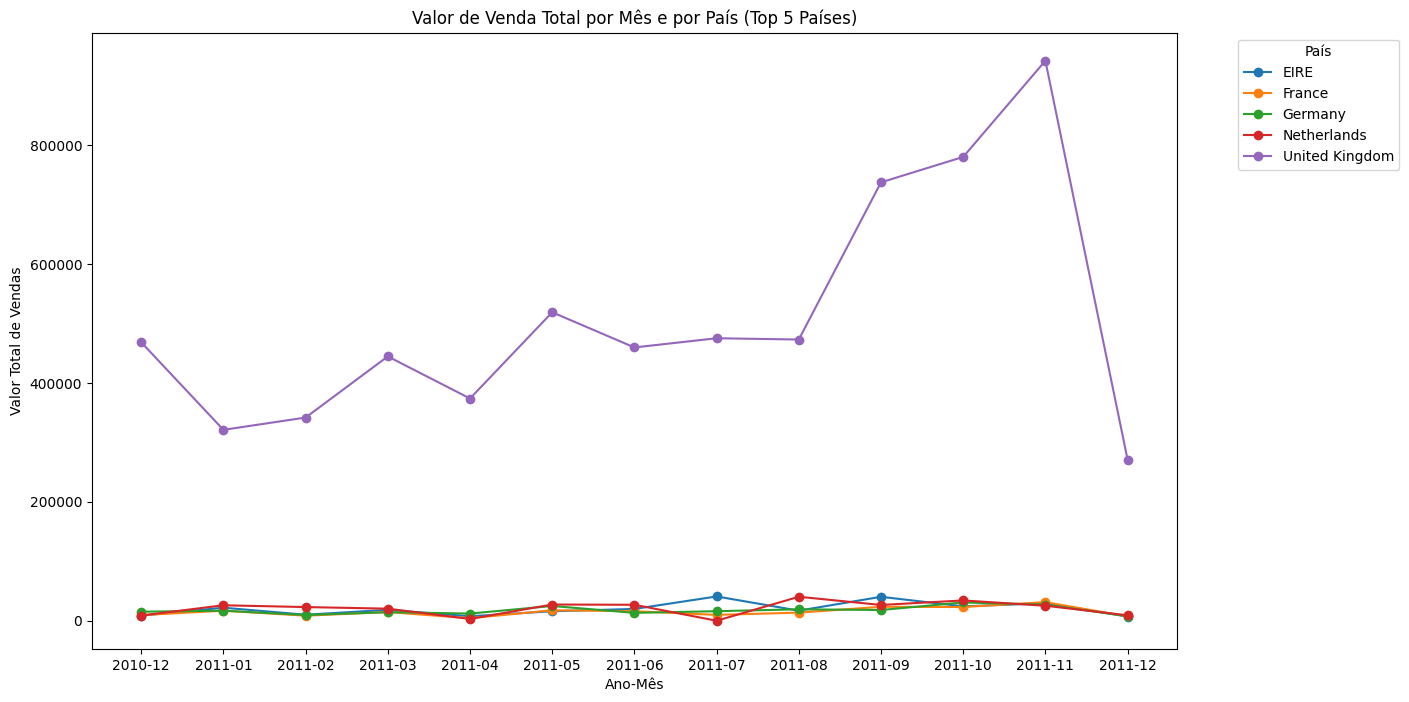


[INFO] Salvando o DataFrame do RFM em um arquivo CSV...

[INFO] Oferecendo ao usuário a opção de download do arquivo CSV...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

class ECommerceRFM:
    def __init__(self):
        warnings.filterwarnings("ignore")  # Inibindo mensagens de aviso
        self.dados = None
        self.descricao_dados = None
        self.tipos_dados = None
        self.valores_faltantes = None
        self.rfm_df = None

    def load_csv(self):
        print("Por favor, faça o upload do arquivo 'data.csv'")
        uploaded = files.upload()
        nome_arquivo = list(uploaded.keys())[0]
        return pd.read_csv(nome_arquivo, encoding='latin1')

    def print_info(self, message):
        print(f"\n[INFO] {message}")

    def remove_outliers(self, dataframe, column, z_score_threshold=3):
        z_scores = np.abs((dataframe[column] - dataframe[column].mean()) / dataframe[column].std())
        outliers = z_scores > z_score_threshold
        return dataframe[~outliers]

    def process_data(self):
        # Carregar dados
        self.print_info("Carregando o arquivo CSV...")
        self.dados = self.load_csv()

        # Imprimir nomes das colunas
        self.print_info("Nomes das Colunas:")
        print(self.dados.columns)

        # Utilizar describe para verificar a distribuição dos dados
        self.print_info("Descrição dos Dados:")
        self.descricao_dados = self.dados.describe()
        print(self.descricao_dados)

        # Analisar tipos dos dados
        self.print_info("Tipos de Dados:")
        self.tipos_dados = self.dados.dtypes
        print(self.tipos_dados)

        # Identificar e remover valores faltantes
        self.print_info("Tratando valores faltantes...")
        self.valores_faltantes = self.dados.isna().sum()
        print("Valores Faltantes:")
        print(self.valores_faltantes)

        # Remover valores faltantes
        self.print_info("Removendo valores faltantes...")
        self.dados.dropna(inplace=True)

        # Remover observações com preços unitários ou quantidades <= 0
        self.print_info("Removendo observações com preços unitários ou quantidades <= 0...")
        self.dados = self.dados[(self.dados['UnitPrice'] > 0) & (self.dados['Quantity'] > 0)]

        # Remover linhas duplicadas
        self.print_info("Removendo linhas duplicadas...")
        self.dados.drop_duplicates(inplace=True)

        # Corrigir tipos de dados das colunas
        self.print_info("Corrigindo tipos de dados...")
        self.dados['InvoiceDate'] = pd.to_datetime(self.dados['InvoiceDate'])
        self.dados['CustomerID'] = self.dados['CustomerID'].astype(int)

        # Tratar outliers
        self.print_info("Tratando outliers usando Z-score...")
        self.dados = self.remove_outliers(self.dados, 'Quantity')
        self.dados = self.remove_outliers(self.dados, 'UnitPrice')

        # Criar coluna 'TotalPrice'
        self.print_info("Criando coluna adicional 'TotalPrice'...")
        self.dados['TotalPrice'] = self.dados['Quantity'] * self.dados['UnitPrice']

        # Calcular data da última compra no dataset como um todo
        self.print_info("Calculando a data da última compra no dataset como um todo...")
        ultima_data_compra = self.dados['InvoiceDate'].max()

        # Exibir resultados
        self.print_info("Resultados após o processamento:")
        print(self.dados.head())

        print(self.descricao_dados)
        print(self.tipos_dados)
        print(self.valores_faltantes)

        # Calcular RFM
        self.calculate_rfm(ultima_data_compra)

        # Plotar gráficos
        self.plot_graphs()

        # Salvar o DataFrame do RFM em um arquivo CSV e oferecer ao usuário a opção de download
        self.save_and_download_rfm()

    def calculate_rfm(self, ultima_data_compra):
        # Agrupar dados por cliente e pedido/compra (InvoiceNo)
        self.print_info("Agrupando os dados por cliente e pedido/compra (InvoiceNo)...")
        rfm_data = self.dados.groupby(['CustomerID', 'InvoiceNo']).agg({
            'InvoiceDate': 'max',
            'TotalPrice': 'sum'
        }).reset_index()

        # Obter data da última compra para cada cliente
        self.print_info("Obtendo a data da última compra para cada cliente...")
        ultima_data_cliente = rfm_data.groupby('CustomerID')['InvoiceDate'].max()

        # Calcular recência (R) em dias
        self.print_info("Calculando a recência (R) em dias...")
        rfm_data['Recencia'] = (ultima_data_compra - ultima_data_cliente).dt.days

        # Calcular frequência (F) - quantidade de compras
        self.print_info("Calculando a frequência (F) - quantidade de compras...")
        rfm_frequencia = rfm_data.groupby('CustomerID')['InvoiceNo'].count()

        # Calcular valor médio das compras para cada cliente (M)
        self.print_info("Calculando o valor médio das compras para cada cliente (M)...")
        rfm_monetario = rfm_data.groupby('CustomerID')['TotalPrice'].mean()

        # Criar DataFrame final do RFM
        self.print_info("Criando o DataFrame final do RFM...")
        self.rfm_df = pd.DataFrame({
            'Recencia': rfm_data.groupby('CustomerID')['Recencia'].min(),
            'Frequencia': rfm_frequencia,
            'Monetario': rfm_monetario
        })

        # Remover valores não numéricos que possam ter sido criados
        self.rfm_df = self.rfm_df.apply(pd.to_numeric, errors='coerce').fillna(0)

        # Exibir resultados do RFM
        self.print_info("Resultados do RFM:")
        print("Exemplo do DataFrame RFM:")
        print(self.rfm_df.head())

    def plot_graphs(self):
        # Top 10 países com maior valor em vendas
        top_paises = self.dados.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
        plt.figure(figsize=(12, 6))
        sns.barplot(x=top_paises.values, y=top_paises.index, palette='viridis')
        plt.title('Top 10 Países com Maior Valor em Vendas')
        plt.xlabel('Valor Total de Vendas')
        plt.ylabel('País')
        plt.show()

        # Top 10 produtos mais vendidos
        top_produtos = self.dados.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
        plt.figure(figsize=(12, 6))
        sns.barplot(x=top_produtos.values, y=top_produtos.index, palette='mako')
        plt.title('Top 10 Produtos Mais Vendidos')
        plt.xlabel('Quantidade Vendida')
        plt.ylabel('Produto')
        plt.show()

        # Valor de venda total por mês
        self.dados['AnoMes'] = self.dados['InvoiceDate'].dt.to_period('M')
        vendas_por_mes = self.dados.groupby('AnoMes')['TotalPrice'].sum()
        plt.figure(figsize=(12, 6))
        vendas_por_mes.plot(marker='o', color='teal')
        plt.title('Valor de Venda Total por Mês')
        plt.xlabel('Ano-Mês')
        plt.ylabel('Valor Total de Vendas')
        plt.show()

        # Valor de venda total por mês e por país (considerando apenas os top 5)
        top_paises = self.dados.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(5).index
        vendas_por_mes_paises = self.dados[self.dados['Country'].isin(top_paises)].groupby(['AnoMes', 'Country'])[
            'TotalPrice'].sum().unstack()

        # Converter períodos para representação numérica
        vendas_por_mes_paises.index = vendas_por_mes_paises.index.astype(str)

        plt.figure(figsize=(14, 8))
        for pais in vendas_por_mes_paises.columns:
            plt.plot(vendas_por_mes_paises.index, vendas_por_mes_paises[pais], label=pais, marker='o')

        plt.title('Valor de Venda Total por Mês e por País (Top 5 Países)')
        plt.xlabel('Ano-Mês')
        plt.ylabel('Valor Total de Vendas')
        plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()

    def save_and_download_rfm(self):
        self.print_info("Salvando o DataFrame do RFM em um arquivo CSV...")
        self.rfm_df.to_csv('e-commerce_RFM.csv', index=True)

        # Oferecer ao usuário a opção de download do arquivo CSV
        self.print_info("Oferecendo ao usuário a opção de download do arquivo CSV...")
        files.download('e-commerce_RFM.csv')

# Instanciar e executar a classe
ecommerce_rfm = ECommerceRFM()
ecommerce_rfm.process_data()
